# White Box - Supervised ML Project
__Name:__ Husain Radhi

__Topic Name:__ Classification

## Introduction
A bank is trying to automate the assignment of credit score using machine learning. They provided a dataset of their clients that include numerous numerical metrics and some categorical ones. It is my job to analyze the dataset and train a model that predicts the credit with little bias.

### Problem Statement
A large global finance bank would like to improve the process of credit risk scoring their customers to eliminate employee biases, human error and standardize the process while improving efficiency. The approach is to build an explainable (white box) machine learning model to replace the current credit scoring system.The output is expected to be explained to a non-technical audience.


### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview, EDA and cleaning
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
bank_df = pd.read_csv("train.csv")

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\3990645240.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  bank_df = pd.read_csv("train.csv")


In [5]:
bank_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
bank_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
bank_df.shape

(100000, 28)

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Let's try to figure out which columns could be useful for predicting the credit score

#### Based on the columns above, the columns for identification (first 6 columns ) are not useful and only the age could be used

#### Let's find out the unique values in Occupation as we do not want too many columns to be added from hot encoding:

In [9]:
bank_df["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

#### Not many, but we need to figure out the empty category

In [10]:
bank_df[bank_df["Occupation"]== "_______"] #It's 7% of the data so let's leave it as it is, it can be considered "others"

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


#### Let's check annual income and why it's an object type

In [11]:
bank_df[bank_df["Annual_Income"].apply(lambda x: isinstance(x,str))] #that means all numbers are considered strings so let's convert

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [12]:
bank_df['Annual_Income'] = bank_df['Annual_Income'].str.replace('_', '', regex=False) #Removing "_" from the end of strings as converting directly to float does not work

In [13]:
bank_df["Annual_Income"]= bank_df["Annual_Income"].astype(float) #Converting column type to float
bank_df["Annual_Income"].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

#### Let's check the num of loans column as it has a similar issue

In [14]:
bank_df['Num_of_Loan'] = bank_df['Num_of_Loan'].str.replace('_', '', regex=False)

In [15]:
bank_df["Num_of_Loan"] = bank_df["Num_of_Loan"].astype(float)

In [16]:
bank_df["Num_of_Loan"].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

#### Let's check the delay from due date column

In [17]:
bank_df["Delay_from_due_date"] #Nothing worth mentioning

0         3
1        -1
2         3
3         5
4         6
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 100000, dtype: int64

#### Let's check the number of delayed payments column

In [18]:
bank_df['Num_of_Delayed_Payment'] = bank_df['Num_of_Delayed_Payment'].str.replace('_', '', regex=False)
bank_df["Num_of_Delayed_Payment"] = bank_df["Num_of_Delayed_Payment"].astype(float)

In [19]:
bank_df["Num_of_Delayed_Payment"].describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

#### Changed credit limit

In [20]:
bank_df['Changed_Credit_Limit'] = bank_df['Changed_Credit_Limit'].str.replace('_', '', regex=False)
bank_df["Changed_Credit_Limit"]

0        11.27
1        11.27
2             
3         6.27
4        11.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 100000, dtype: object

In [21]:
#bank_df["Changed_Credit_Limit"] = bank_df["Changed_Credit_Limit"].astype(float) shows an error as it cannot convert an empty string to a number

In [22]:
bank_df['Changed_Credit_Limit'] = bank_df['Changed_Credit_Limit'].replace('', np.nan, regex=False) #to convert empty srings to Not a Number

In [23]:
bank_df["Changed_Credit_Limit"] = bank_df["Changed_Credit_Limit"].astype(float) #finally works

In [24]:
bank_df["Changed_Credit_Limit"].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

#### Credit Mix

In [25]:
bank_df["Credit_Mix"] #nothing of note

0           _
1        Good
2        Good
3        Good
4        Good
         ... 
99995       _
99996       _
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object

#### Outstanding Debt

In [26]:
bank_df["Outstanding_Debt"]

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: object

In [27]:
bank_df['Outstanding_Debt'] = bank_df['Outstanding_Debt'].str.replace('_', '', regex=False)
bank_df["Outstanding_Debt"]

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: object

In [28]:
bank_df["Outstanding_Debt"] = bank_df["Outstanding_Debt"].astype(float)

In [29]:
bank_df["Outstanding_Debt"].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

#### Credit History Age

In [30]:
bank_df["Credit_History_Age"].nunique() #Too many unique values, may not use this column

404

In [31]:
bank_df["Credit_History_Age"].unique() #I would need to change all strings to numerical values

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [32]:
import re                       #Imported re library to simplify the code

def duration_to_months(s):     #function to replace the text with months
    if not isinstance(s, str): #If there is no string it returns null
        return None
    
    s = s.lower()            #changing them to lowercase
    
    years = re.search(r'(\d+)\s*year', s)       #searches for a string in this format
    months = re.search(r'(\d+)\s*month', s)
    
    years = int(years.group(1)) if years else 0 #takes group(1) which is (\d+) which is the  number in the string and converts it to integer
    months = int(months.group(1)) if months else 0
    
    return years * 12 + months #converts year to months and sums it with the months
bank_df["Credit_History_Age"]= bank_df["Credit_History_Age"].apply(duration_to_months) #applying the function to the column

In [33]:
bank_df["Credit_History_Age"].describe()

count    90970.000000
mean       221.195405
std         99.741364
min          1.000000
25%        144.000000
50%        219.000000
75%        302.000000
max        404.000000
Name: Credit_History_Age, dtype: float64

#### Payment of Min Amount

In [34]:
bank_df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

#### Amount invested monthly

In [35]:
bank_df["Amount_invested_monthly"]

0         80.41529543900253
1        118.28022162236736
2           81.699521264648
3         199.4580743910713
4        41.420153086217326
                ...        
99995     60.97133255718485
99996     54.18595028760385
99997     24.02847744864441
99998    251.67258219721603
99999     167.1638651610451
Name: Amount_invested_monthly, Length: 100000, dtype: object

In [36]:
bank_df['Amount_invested_monthly'] = bank_df['Amount_invested_monthly'].str.replace('_', '', regex=False)
bank_df["Amount_invested_monthly"] = bank_df["Amount_invested_monthly"].astype(float)

In [37]:
bank_df["Amount_invested_monthly"].describe()

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [38]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [39]:
bank_df["Payment_Behaviour"].unique() #Will clean the odd value later

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [40]:
bank_df['Monthly_Balance'] = bank_df['Monthly_Balance'].str.replace('_', '', regex=False)
bank_df["Monthly_Balance"] = bank_df["Monthly_Balance"].astype(float)
bank_df["Monthly_Balance"].describe()

count    9.713200e+04
mean    -3.088580e+22
std      3.208492e+24
min     -3.333333e+26
25%      2.699858e+02
50%      3.364493e+02
75%      4.696405e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

In [41]:
bank_df["Credit_Score"]

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

#### Let's remove null values now

In [42]:
bank_df_clean=bank_df.loc[:,"Age":] #dropping unnecessary columns
bank_df_clean

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,_,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2.0,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2.0,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [43]:
bank_df_clean = bank_df_clean.drop("SSN", axis=1)

In [44]:
bank_df_clean.dropna()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,271.0,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,28_,_______,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,7,...,Good,605.03,38.550848,320.0,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,28,Teacher,34847.84,3037.986667,2,1385,6,1.0,Credit-Builder Loan,3,...,_,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98296,38,Lawyer,41015.55,3152.962500,0,4,2510,1.0,Payday Loan,9,...,_,599.40,31.469081,299.0,No,25.671257,232.909909,Low_spent_Small_value_payments,346.715084,Standard
98298,38,Lawyer,41015.55,3152.962500,0,4,4,1.0,Payday Loan,9,...,_,599.40,30.760830,301.0,No,25.671257,10000.000000,Low_spent_Small_value_payments,178.327142,Standard
98299,38,Lawyer,41015.55,3152.962500,0,4,4,1.0,Payday Loan,9,...,Good,599.40,31.936092,302.0,NM,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,Standard
98300,38,Lawyer,41015.55,3152.962500,1194,4,4,1.0,Payday Loan,9,...,Good,599.40,26.268474,303.0,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,Standard


In [45]:
bank_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [46]:
bank_df_clean["Monthly_Inhand_Salary"].describe() #replacing nulls with the median is not a terrible idea

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [47]:
median_mis=bank_df_clean["Monthly_Inhand_Salary"].median()
bank_df_clean["Monthly_Inhand_Salary"]=bank_df_clean["Monthly_Inhand_Salary"].fillna(median_mis)
bank_df_clean["Monthly_Inhand_Salary"]

0        1824.843333
1        3093.745000
2        3093.745000
3        3093.745000
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64

In [48]:
bank_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [49]:
bank_df_clean["Type_of_Loan"].nunique() #Let's just drop this whole column as it is categorical and has many values

6260

In [50]:
bank_df_clean= bank_df_clean.drop("Type_of_Loan", axis=1)

In [51]:
bank_df_clean["Num_of_Delayed_Payment"].describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [52]:
bank_df_clean["Num_of_Delayed_Payment"]

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

In [53]:
bank_df_clean

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23,Scientist,19114.12,3093.745000,3,4,3,4.0,-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500,Scientist,19114.12,3093.745000,3,4,3,4.0,3,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23,Scientist,19114.12,3093.745000,3,4,3,4.0,5,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4.0,6,NaN,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,_,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,20,NaN,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


(array([92402.,   135.,   167.,   151.,   143.]),
 array([-3.000e+00,  8.770e+02,  1.757e+03,  2.637e+03,  3.517e+03,
         4.397e+03]),
 <BarContainer object of 5 artists>)

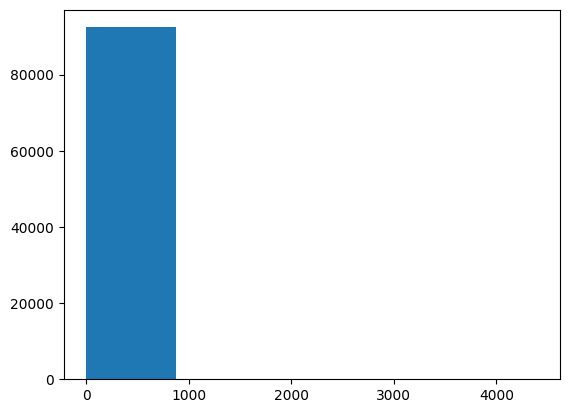

In [54]:
plt.hist(bank_df_clean["Num_of_Delayed_Payment"], bins = 5) # does not work well with this data

In [55]:
import seaborn as sns

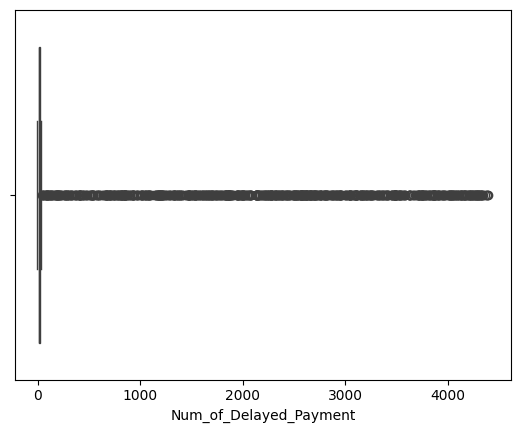

In [56]:
sns.boxplot(x=bank_df_clean["Num_of_Delayed_Payment"])
plt.show()

#### Let's remove the outliers

In [57]:
bank_df_clean["Num_of_Delayed_Payment"]

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

In [58]:
bank_df_clean

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23,Scientist,19114.12,3093.745000,3,4,3,4.0,-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500,Scientist,19114.12,3093.745000,3,4,3,4.0,3,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23,Scientist,19114.12,3093.745000,3,4,3,4.0,5,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4.0,6,NaN,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,_,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2.0,20,NaN,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [59]:
bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"]>100][["Num_of_Delayed_Payment"]] #This will show the outlier rows

,Num_of_Delayed_Payment
252,3318.0
284,3083.0
304,1338.0
409,3104.0
643,183.0
...,...
99133,3336.0
99402,3392.0
99562,3688.0
99563,221.0


#### I considered clipping outliers then replacing the missing values with median or mean, but these outliers may be useful. As such, I decided to just replace the missing values with the median, because there is heavy clustering in the data and the outliers are far off. In this case the median makes more sense than the mean.

In [60]:
delayed_median=bank_df_clean["Num_of_Delayed_Payment"].median()

In [61]:
bank_df_clean["Num_of_Delayed_Payment"].fillna(delayed_median, inplace = True)

In [62]:
bank_df_clean["Num_of_Delayed_Payment"].describe() #I notice there are negative values, let's check them

count    100000.000000
mean         29.738370
std         218.017612
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [63]:
bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"] #644 rows of negative values

10      -1.0
698     -1.0
1253    -3.0
1561    -2.0
2167    -1.0
        ... 
99269   -2.0
99512   -2.0
99515   -2.0
99586   -2.0
99965   -1.0
Name: Num_of_Delayed_Payment, Length: 644, dtype: float64

In [64]:
bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"].unique() #From what i understand, since the values go only from -1 to -3, these are probably not an input mistake and more of a code for missing values. As such, I will replace them with the median

array([-1., -3., -2.])

#### From what i understand, since the values go only from -1 to -3, these are probably not an input mistake and more of a code for missing values. As such, I will replace them with the median

In [65]:
bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"] = np.nan

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\1771350772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"]<0]["Num_of_Delayed_Payment"] = np.nan


In [66]:
bank_df_clean.loc[bank_df_clean["Num_of_Delayed_Payment"] < 0, "Num_of_Delayed_Payment"] = np.nan #replaces the negative values with nulls

In [67]:
bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"].isnull()] #It worked and replaces them with nulls

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,28,Teacher,34847.84,3037.986667,2,1385,6,1.0,3,NaN,...,_,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
698,28,Mechanic,15398.95,3093.745000,1,7,5,4.0,1,NaN,...,Good,343.84,33.494442,341.0,NM,34.813970,47.607470,High_spent_Medium_value_payments,322.403143,Standard
1253,49,Doctor,15560525.00,3093.745000,0,4,4,0.0,1,NaN,...,Good,1287.59,30.801079,307.0,NM,0.000000,97.705452,Low_spent_Small_value_payments,319.668590,Standard
1561,1383,Architect,30922.28,2494.856667,1,5,12,2.0,14,NaN,...,Good,957.53,39.135924,256.0,No,30.338204,159.523585,Low_spent_Large_value_payments,329.623877,Poor
2167,27,Accountant,34841.87,3025.489167,1,7,1,2.0,1,NaN,...,_,142.05,38.351183,374.0,No,33.366098,174.874086,Low_spent_Medium_value_payments,374.308732,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99269,24,Accountant,74349.18,6133.765000,0,3,2,2.0,11,NaN,...,Good,929.91,26.522995,344.0,No,66.417096,252.992626,Low_spent_Large_value_payments,NaN,Good
99512,8490,Lawyer,150131.68,12596.973333,5,1,4,0.0,8,NaN,...,_,1138.36,30.013470,376.0,No,0.000000,949.847264,Low_spent_Small_value_payments,NaN,Standard
99515,54,Lawyer,150131.68,12596.973333,5,1,4,0.0,8,NaN,...,_,1138.36,41.277741,379.0,No,0.000000,122.041469,High_spent_Large_value_payments,NaN,Good
99586,28,Mechanic,17013.29,1326.774167,2,1,10,1.0,6,NaN,...,_,1452.79,27.513691,385.0,No,13.109663,100.828505,Low_spent_Small_value_payments,NaN,Good


In [68]:
bank_df_clean["Num_of_Delayed_Payment"].fillna(delayed_median, inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\3626635931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Num_of_Delayed_Payment"].fillna(delayed_median, inplace = True)


In [69]:
bank_df_clean.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,95521.000000,9.713200e+04
mean,1.764157e+05,4029.084964,17.091280,22.47443,72.466040,3.009960,21.068780,29.839190,10.389025,27.754251,1426.220376,32.285173,221.195405,1403.118217,637.412998,-3.088580e+22
std,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,62.647879,14.860104,218.006683,6.789496,193.177339,1155.129026,5.116875,99.741364,8306.041270,2043.319327,3.208492e+24
min,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,-3.333333e+26
25%,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,144.000000,30.306660,74.534002,2.699858e+02
50%,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,219.000000,69.249473,135.925682,3.364493e+02
75%,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,302.000000,161.224249,265.731733,4.696405e+02
max,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,10000.000000,1.602041e+03


#### Let's go back and check for negative values in other columns

In [70]:
bank_df_clean["Age"].describe() # I should conver it first as I missed it

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object

In [71]:
bank_df_clean['Age'] = bank_df_clean["Age"].str.replace('_', '', regex=False)
bank_df_clean["Age"] = bank_df_clean["Age"].astype(int)

In [72]:
bank_df_clean["Age"].describe() #The range is insane

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

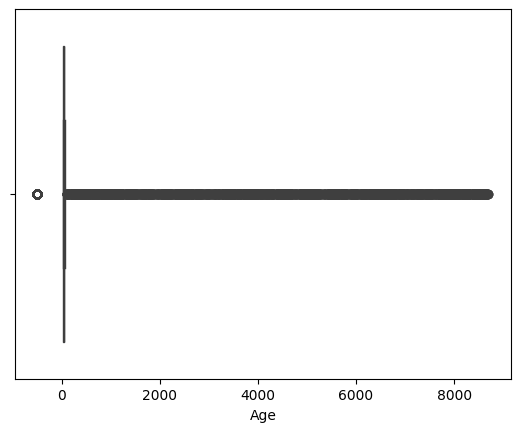

In [73]:
sns.boxplot(x=bank_df_clean["Age"])
plt.show()

In [74]:
bank_df_clean[bank_df_clean["Age"]>80] #Let's search for the absurd values

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56,7580,Media_Manager,34081.38,3093.745000,8,7,15,3.0,30,11.0,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
122,181,Scientist,31993.78,2942.148333,6,6,7,2.0,8,14.0,...,Standard,818.22,27.380109,204.0,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,995,Accountant,43070.24,3622.186667,3,3,18,1.0,11,8.0,...,Standard,1233.10,24.331772,233.0,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
243,5079,Scientist,20186.02,1684.168333,1,5,1,2.0,5,6.0,...,Good,413.32,22.743582,222.0,No,29.534584,104.723834,High_spent_Small_value_payments,294.158416,Good
288,6409,Mechanic,29469.98,2227.831667,1231,7,24,5.0,53,21.0,...,_,3421.66,24.639658,NaN,Yes,69.685459,59.825596,!@9#%8,363.272112,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99877,6476,Scientist,118677.54,9963.795000,4,4,6,-100.0,3,14.0,...,Good,995.47,38.556181,364.0,No,237.106366,231.276530,High_spent_Large_value_payments,NaN,Good
99908,4808,Writer,87695.34,7337.945000,2,7,7,0.0,5,10.0,...,Good,361.68,28.147193,233.0,No,65671.000000,168.798784,High_spent_Large_value_payments,NaN,Standard
99913,2263,Media_Manager,20059.98,1523.665000,8,5,12,4.0,25,11.0,...,Good,909.01,25.982154,196.0,No,45.076827,74.713580,High_spent_Small_value_payments,NaN,Poor
99950,1342,Media_Manager,59146.36,4908.863333,3,6,6,1.0,8,6.0,...,_,418.03,38.199635,247.0,No,26.778419,502.376320,Low_spent_Small_value_payments,NaN,Standard


In [75]:
bank_df_clean[bank_df_clean["Age"]<0]["Age"].unique() #Only one type of negative value

array([-500])

#### It may be better to just drop the column but I will replace it with the median and see how it goes

In [76]:
bank_df_clean.loc[bank_df_clean["Age"]>80, "Age"] = np.nan

In [77]:
bank_df_clean.loc[bank_df_clean["Age"]<0, "Age"] = np.nan

In [78]:
age_median = bank_df_clean["Age"].median()

In [79]:
bank_df_clean["Age"].fillna(age_median, inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\2596669918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Age"].fillna(age_median, inplace = True)


In [80]:
bank_df_clean["Age"].describe() # Okay we can move on from this one

count    100000.00000
mean         33.31111
std          10.61888
min          14.00000
25%          25.00000
50%          33.00000
75%          41.00000
max          56.00000
Name: Age, dtype: float64

#### Let's go back to payment behaviour

In [81]:
bank_df_clean["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [82]:
bank_df_clean[bank_df_clean["Payment_Behaviour"]=='!@9#%8'] #7600 rows is more than I expected

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,23.0,Scientist,19114.12,3093.745000,3,4,3,4.0,8,4.0,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,!@9#%8,340.479212,Good
16,34.0,_______,143162.64,12187.220000,1,5,8,3.0,5,8.0,...,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,!@9#%8,1043.315978,Good
32,21.0,Developer,35547.71,2853.309167,7,5,5,0.0,5,14.0,...,Standard,943.86,39.797764,368.0,Yes,0.000000,276.725394,!@9#%8,288.605522,Standard
47,31.0,Lawyer,73928.46,5988.705000,4,5,8,0.0,8,7.0,...,Good,548.20,31.580990,390.0,No,0.000000,42.635590,!@9#%8,796.234910,Good
54,34.0,Lawyer,10909427.00,3093.745000,0,1,8,2.0,0,2.0,...,Good,352.16,26.947565,373.0,No,911.220179,930.391898,!@9#%8,326.241830,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,33.0,Media_Manager,59146.36,4908.863333,2,5,6,1.0,8,6.0,...,Good,418.03,28.091458,244.0,No,26.778419,183.584149,!@9#%8,NaN,Standard
99980,49.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,12.0,...,_,620.64,27.495263,361.0,No,84.205949,78.497727,!@9#%8,NaN,Standard
99982,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,13.0,...,Good,620.64,38.850680,363.0,No,84.205949,82.825572,!@9#%8,NaN,Good
99989,28.0,_______,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,Bad,3571.70,33.359987,73.0,Yes,60.964772,74.366603,!@9#%8,NaN,Standard


In [83]:
bank_df_clean["Payment_Behaviour"].value_counts() 

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

#### I will just rename the category to "others"

In [84]:
bank_df_clean["Payment_Behaviour"] = bank_df_clean["Payment_Behaviour"].replace("!@9#%8", "Others")

In [85]:
bank_df_clean["Payment_Behaviour"].value_counts() 

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Others                               7600
Name: count, dtype: int64

#### Will do the same thing to Occupation

In [86]:
bank_df_clean["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [87]:
bank_df_clean["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [88]:
bank_df_clean["Occupation"] = bank_df_clean["Occupation"].replace('_______','Others')
bank_df_clean["Occupation"].value_counts()

Occupation
Others           7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [89]:
bank_df_clean["Monthly_Inhand_Salary"].describe() #This column is okay

count    100000.000000
mean       4029.084964
std        2961.363540
min         303.645417
25%        1792.084167
50%        3093.745000
75%        5371.525000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [90]:
bank_df_clean["Num_Bank_Accounts"].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [91]:
mode_acc= bank_df_clean["Num_Bank_Accounts"].mode() #Median and mode are the same so just use that to replace them

In [92]:
bank_df_clean[bank_df_clean["Num_Bank_Accounts"]>10]["Num_Bank_Accounts"].describe()

count    1324.000000
mean      890.878399
std       516.741086
min        11.000000
25%       455.000000
50%       878.500000
75%      1332.000000
max      1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [93]:
bank_df_clean[bank_df_clean["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"]

30330   -1
30331   -1
30332   -1
30333   -1
30334   -1
30335   -1
43689   -1
43690   -1
43691   -1
43692   -1
43693   -1
43694   -1
43695   -1
47212   -1
47213   -1
47214   -1
47215   -1
55636   -1
55637   -1
55638   -1
55639   -1
Name: Num_Bank_Accounts, dtype: int64

In [94]:
bank_df_clean.loc[bank_df_clean["Num_Bank_Accounts"]>10,"Num_Bank_Accounts"] = np.nan 
bank_df_clean.loc[bank_df_clean["Num_Bank_Accounts"]<0,"Num_Bank_Accounts"] = np.nan

In [95]:
bank_df_clean[bank_df_clean["Num_Bank_Accounts"].isnull()]["Num_Bank_Accounts"]

267     NaN
288     NaN
310     NaN
339     NaN
356     NaN
         ..
99591   NaN
99638   NaN
99666   NaN
99722   NaN
99916   NaN
Name: Num_Bank_Accounts, Length: 1345, dtype: float64

In [96]:
bank_df_clean["Num_Bank_Accounts"].fillna(mode_acc, inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\2099522545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Num_Bank_Accounts"].fillna(mode_acc, inplace = True)


In [97]:
bank_df_clean["Num_Bank_Accounts"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 100000, dtype: float64

In [98]:
bank_df_clean["Num_Bank_Accounts"].describe() #The count does not add up

count    98655.000000
mean         5.368466
std          2.592011
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Bank_Accounts, dtype: float64

In [99]:
bank_df_clean["Num_Bank_Accounts"].isna().sum() #Not sure why there are nulls still

np.int64(1345)

In [100]:
bank_df_clean[bank_df_clean["Num_Bank_Accounts"]=="NaN"]["Num_Bank_Accounts"].sum() #Not sure why there are nulls still

np.float64(0.0)

In [101]:
bank_df_clean["Num_Bank_Accounts"].fillna(6, inplace = True) #Let's try using the actual number instead of a variable

In [102]:
bank_df_clean[bank_df_clean["Num_Bank_Accounts"].isnull()]["Num_Bank_Accounts"] #It works now

Series([], Name: Num_Bank_Accounts, dtype: float64)

In [103]:
bank_df_clean["Num_Bank_Accounts"].isna().sum() #Maybe there was an issue with the mode variable

np.int64(0)

In [104]:
bank_df_clean["Num_Bank_Accounts"].describe() #It is fine, moving on

count    100000.000000
mean          5.376960
std           2.575548
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max          10.000000
Name: Num_Bank_Accounts, dtype: float64

In [105]:
bank_df_clean["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

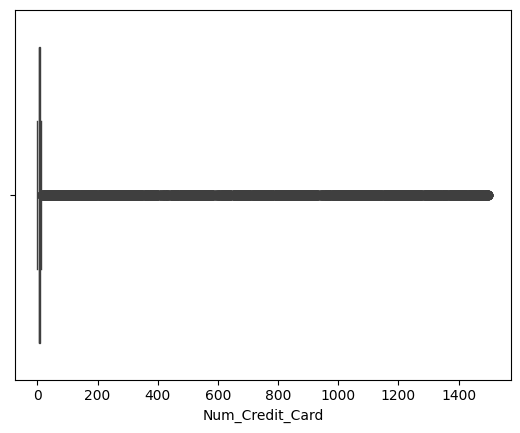

In [106]:
sns.boxplot(x=bank_df_clean["Num_Credit_Card"])
plt.show()

In [107]:
Q1 = bank_df_clean["Num_Credit_Card"].quantile(0.25) #I will manually calculate the upper outliers
Q3 = bank_df_clean["Num_Credit_Card"].quantile(0.75)
IQR = Q3-Q1

In [108]:
Upper_lim = upper = Q3 + 1.5 * IQR
Upper_lim #I will just consider it to be 11

np.float64(11.5)

In [109]:
bank_df_clean[bank_df_clean["Num_Credit_Card"]>11] 

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,28.0,Teacher,34847.84,3037.986667,2.0,1385,6,1.0,3,14.0,...,_,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
40,31.0,Lawyer,73928.46,3093.745000,4.0,1288,8,0.0,12,10.0,...,Good,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
157,32.0,Others,19300.34,1512.361667,6.0,1029,17,5.0,51,17.0,...,Bad,2430.21,25.847791,223.0,Yes,49.572062,83.447449,Low_spent_Large_value_payments,288.216656,Poor
163,41.0,Musician,19514.88,1828.240000,7.0,488,17,0.0,30,12.0,...,Standard,881.40,34.503707,234.0,No,0.000000,45.388820,High_spent_Medium_value_payments,387.435180,Poor
207,48.0,Entrepreneur,20787.69,1999.307500,8.0,1381,14,3.0,22,14.0,...,_,614.60,35.344188,221.0,No,42.221993,21.745531,High_spent_Large_value_payments,375.963226,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99611,31.0,Journalist,64901.37,5298.447500,3.0,514,20,-100.0,14,15.0,...,Standard,442.06,29.639741,373.0,Yes,0.000000,162.171160,High_spent_Medium_value_payments,NaN,Standard
99615,32.0,Journalist,64901.37,3093.745000,3.0,232,20,0.0,19,18.0,...,Standard,442.06,29.145534,377.0,Yes,0.000000,126.263036,High_spent_Large_value_payments,NaN,Standard
99619,30.0,Others,142560.36,11773.030000,6.0,1430,13,1.0,23,15.0,...,Standard,220.75,34.671699,210.0,No,76.772094,982.946968,Low_spent_Large_value_payments,NaN,Standard
99769,23.0,Architect,60015.32,5121.276667,7.0,679,14,978.0,8,8.0,...,_,1095.15,35.864367,183.0,Yes,187.008683,241.313632,Low_spent_Large_value_payments,NaN,Standard


In [110]:
bank_df_clean.loc[bank_df_clean["Num_Credit_Card"]>11, "Num_Credit_Card"]= np.nan

In [111]:
credit_mode = bank_df_clean["Num_Credit_Card"].median()
credit_mode

np.float64(5.0)

In [112]:
bank_df_clean["Num_Credit_Card"].fillna(credit_mode, inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\3748584010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Num_Credit_Card"].fillna(credit_mode, inplace = True)


In [113]:
bank_df_clean["Num_Credit_Card"].describe()

count    100000.000000
mean          5.521210
std           2.045632
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

In [114]:
bank_df_clean["Interest_Rate"].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [115]:
bank_df_clean[bank_df_clean["Interest_Rate"]>50] #above %50 do not make a lot of sense so i will replace them with the mode

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
44,31.0,Lawyer,73928.46,5988.705000,4.0,5.0,5318,0.0,11,7.0,...,_,548.20,26.333310,387.0,No,0.000000,177.951836,Low_spent_Large_value_payments,690.918664,Good
89,33.0,Engineer,88640.24,7266.686667,3.0,6.0,433,2.0,4,2.0,...,Good,950.36,41.036168,306.0,NM,135.173371,157.174788,High_spent_Large_value_payments,674.320507,Good
167,41.0,Musician,19514.88,3093.745000,7.0,5.0,5240,0.0,26,11.0,...,_,881.40,28.781888,238.0,No,0.000000,99.141541,High_spent_Small_value_payments,343.682459,Poor
178,20.0,Entrepreneur,106733.13,8873.427500,4.0,4.0,4975,0.0,2,6.0,...,Good,76.23,42.070459,395.0,No,0.000000,172.032829,High_spent_Large_value_payments,955.309921,Good
229,40.0,Architect,28572.39,3093.745000,6.0,3.0,668,3.0,25,11.0,...,Standard,400.07,35.693949,368.0,Yes,69.602920,129.264835,Low_spent_Small_value_payments,312.135495,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99791,54.0,Musician,99520.50,8479.375000,3.0,1.0,4396,3.0,8,5.0,...,Good,547.21,38.798114,200.0,NM,196.528591,147.563516,Others,NaN,Good
99801,16.0,Developer,14937.49,1142.790833,8.0,8.0,387,-100.0,42,13.0,...,Bad,3699.44,35.964828,159.0,Yes,50.960878,149.887864,Low_spent_Small_value_payments,NaN,Standard
99882,31.0,Mechanic,16884797.00,5440.945000,7.0,3.0,1947,0.0,7,8.0,...,Standard,330.60,38.524095,276.0,Yes,0.000000,10000.000000,High_spent_Small_value_payments,NaN,Standard
99914,54.0,Media_Manager,20059.98,1523.665000,8.0,5.0,360,4.0,25,9.0,...,Good,909.01,29.204711,197.0,No,45.076827,111.567139,Low_spent_Large_value_payments,NaN,Poor


In [116]:
bank_df_clean["Interest_Rate"].mode() #Will use the mode this time because it makes more sense for this column

0    8
Name: Interest_Rate, dtype: int64

In [117]:
bank_df_clean.loc[bank_df_clean["Interest_Rate"]>50, "Interest_Rate"] = np.nan

In [118]:
mode_interest = bank_df_clean["Interest_Rate"].mode()

In [119]:
bank_df_clean["Interest_Rate"].fillna(mode_interest[0], inplace= True) #Apparently i need to specify the position of the value in the mode "variable" because it is a series

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\1732449654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Interest_Rate"].fillna(mode_interest[0], inplace= True) #Apparently i need to specify the position of the value in the mode "variable" because it is a series


In [120]:
bank_df_clean["Interest_Rate"].describe()

count    100000.000000
mean         14.398750
std           8.699405
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          34.000000
Name: Interest_Rate, dtype: float64

In [121]:
bank_df_clean["Num_of_Loan"].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [122]:
bank_df_clean["Num_of_Loan"].mode()[0]

np.float64(3.0)

In [123]:
bank_df_clean[bank_df_clean["Num_of_Loan"]>10]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
21,34.0,Engineer,143162.640,12187.220000,1.0,5.0,8.0,967.0,8,6.0,...,Good,1303.01,39.783993,218.0,No,246.992319,257.808099,High_spent_Medium_value_payments,963.921581,Good
810,26.0,Writer,134321.440,11064.453333,3.0,5.0,12.0,1464.0,26,21.0,...,Standard,1428.68,34.223492,394.0,Yes,253.688244,NaN,High_spent_Large_value_payments,949.502370,Standard
1390,21.0,Lawyer,124419.660,10221.305000,3.0,4.0,11.0,622.0,9,10.0,...,Good,923.85,27.446584,389.0,No,344.181536,288.564423,Others,659.384541,Standard
2008,21.0,Accountant,31069.320,2361.110000,2.0,3.0,12.0,352.0,14,3.0,...,Good,343.60,36.403191,227.0,No,34.168604,139.087148,Low_spent_Medium_value_payments,342.855248,Good
2273,33.0,Others,38539.570,3438.630833,4.0,2.0,3.0,472.0,4,1.0,...,Good,526.62,30.039998,356.0,No,22.683279,285.282071,Low_spent_Small_value_payments,325.897733,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99760,35.0,Others,17818.600,1659.883333,4.0,6.0,14.0,661.0,30,12.0,...,Standard,301.52,26.264920,219.0,No,11.581102,203.733268,Low_spent_Small_value_payments,NaN,Standard
99769,23.0,Architect,60015.320,5121.276667,7.0,5.0,14.0,978.0,8,8.0,...,_,1095.15,35.864367,183.0,Yes,187.008683,241.313632,Low_spent_Large_value_payments,NaN,Standard
99845,23.0,Architect,11834.645,688.220417,5.0,7.0,10.0,216.0,27,16.0,...,Standard,1095.90,33.072088,NaN,Yes,11.089575,45.455499,Low_spent_Small_value_payments,NaN,Standard
99853,40.0,Scientist,81093.160,7017.763333,10.0,7.0,17.0,349.0,29,20.0,...,Bad,4523.30,35.925627,118.0,NM,409.039442,314.580409,Low_spent_Medium_value_payments,NaN,Standard


In [124]:
Q1 = bank_df_clean["Num_of_Loan"].quantile(0.25) #I will manually calculate the upper outliers
Q3 = bank_df_clean["Num_of_Loan"].quantile(0.75)
IQR = Q3-Q1
Upper_lim = upper = Q3 + 1.5 * IQR
Upper_lim 

np.float64(11.0)

In [125]:
bank_df_clean.loc[bank_df_clean["Num_of_Loan"]>11,"Num_of_Loan"] = np.nan

In [126]:
bank_df_clean.loc[bank_df_clean["Num_of_Loan"]<0,"Num_of_Loan"] = np.nan

In [127]:
bank_df_clean["Num_of_Loan"].fillna(bank_df_clean["Num_of_Loan"].mode()[0], inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\4187965254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Num_of_Loan"].fillna(bank_df_clean["Num_of_Loan"].mode()[0], inplace = True)


In [128]:
bank_df_clean["Num_of_Loan"].describe()

count    100000.000000
mean          3.510550
std           2.395985
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

In [129]:
bank_df_clean[bank_df_clean["Delay_from_due_date"]<0]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,-1,14.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
49,34.0,Lawyer,131313.40,11242.783333,0.0,1.0,8.0,2.0,-1,2.0,...,Good,352.16,31.983710,368.0,No,137.644605,698.873271,High_spent_Small_value_payments,547.760457,Good
74,44.0,Journalist,31370.80,2825.233333,1.0,6.0,12.0,2.0,-2,0.0,...,Good,421.43,31.046418,319.0,No,46.616129,140.820696,Low_spent_Medium_value_payments,375.086508,Good
78,45.0,Journalist,31370.80,2825.233333,1.0,6.0,12.0,3.0,-1,2.0,...,Good,421.43,22.762202,323.0,No,46.616129,188.394900,Low_spent_Small_value_payments,337.512304,Good
79,45.0,Journalist,31370.80,3093.745000,1.0,6.0,12.0,2.0,-2,2.0,...,_,421.43,37.565053,324.0,No,46.616129,252.644827,Low_spent_Small_value_payments,273.262377,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99198,35.0,Mechanic,96047.22,7775.935000,3.0,3.0,1.0,1.0,-2,6.0,...,Good,1366.21,34.080533,214.0,No,49.656727,113.121623,Others,NaN,Good
99358,44.0,Manager,19631.26,1724.938333,2.0,4.0,9.0,4.0,-1,4.0,...,_,823.21,39.130281,388.0,No,65.051299,129.026936,Low_spent_Small_value_payments,NaN,Good
99368,31.0,Media_Manager,61465.78,5082.148333,2.0,3.0,11.0,3.0,-4,10.0,...,Good,608.87,26.846460,214.0,No,31.650737,10000.000000,Low_spent_Medium_value_payments,NaN,Standard
99371,31.0,Media_Manager,61465.78,5082.148333,2.0,3.0,11.0,1.0,-5,10.0,...,_,608.87,25.443676,217.0,No,31.650737,493.144096,Low_spent_Medium_value_payments,NaN,Good


In [130]:
bank_df_clean.loc[bank_df_clean["Delay_from_due_date"]<0, "Delay_from_due_date"] = np.nan
bank_df_clean["Delay_from_due_date"].fillna(bank_df_clean["Delay_from_due_date"].median(), inplace = True)
bank_df_clean["Delay_from_due_date"].describe()

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\848381313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Delay_from_due_date"].fillna(bank_df_clean["Delay_from_due_date"].median(), inplace = True)


count    100000.000000
mean         21.188290
std          14.752957
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [131]:
bank_df_clean["Num_of_Delayed_Payment"].describe()

count    100000.000000
mean         29.839190
std         218.006683
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

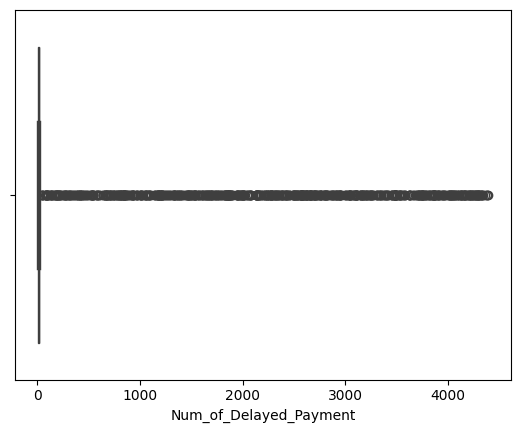

In [132]:
sns.boxplot(x=bank_df_clean["Num_of_Delayed_Payment"])
plt.show()

In [133]:
bank_df_clean[bank_df_clean["Num_of_Delayed_Payment"]>100][["Num_of_Delayed_Payment"]]

,Num_of_Delayed_Payment
252,3318.0
284,3083.0
304,1338.0
409,3104.0
643,183.0
...,...
99133,3336.0
99402,3392.0
99562,3688.0
99563,221.0


#### I was going to keep the outliers but honestly they make no sense so I will change them

In [134]:
Q1 = bank_df_clean["Num_of_Delayed_Payment"].quantile(0.25) #I will manually calculate the upper outliers
Q3 = bank_df_clean["Num_of_Delayed_Payment"].quantile(0.75)
IQR = Q3-Q1
Upper_lim = upper = Q3 + 1.5 * IQR
Upper_lim # I will round it down

np.float64(31.5)

In [135]:
bank_df_clean['Num_of_Delayed_Payment'].mode()

0    14.0
Name: Num_of_Delayed_Payment, dtype: float64

In [136]:
bank_df_clean['Num_of_Delayed_Payment'].median()

np.float64(14.0)

In [137]:
bank_df_clean.loc[bank_df_clean["Num_of_Delayed_Payment"]>31, "Num_of_Delayed_Payment"] = np.nan
bank_df_clean["Num_of_Delayed_Payment"].fillna(bank_df_clean["Num_of_Delayed_Payment"].median(), inplace = True) #median are mode are the same so i can use either
bank_df_clean["Num_of_Delayed_Payment"].describe()

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\594187441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Num_of_Delayed_Payment"].fillna(bank_df_clean["Num_of_Delayed_Payment"].median(), inplace = True) #median are mode are the same so i can use either


count    100000.000000
mean         13.468280
std           5.943685
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [138]:
bank_df_clean["Changed_Credit_Limit"].describe() #nothing too strange so i will just fill in null values

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [139]:
median_cred_limt = bank_df_clean["Changed_Credit_Limit"].median()

In [140]:
bank_df_clean["Changed_Credit_Limit"].fillna(median_cred_limt, inplace = True) 
bank_df_clean["Changed_Credit_Limit"]

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\2962158025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Changed_Credit_Limit"].fillna(median_cred_limt, inplace = True)


0        11.27
1        11.27
2         9.40
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [141]:
bank_df_clean["Num_Credit_Inquiries"].describe() 

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [142]:
bank_df_clean["Num_Credit_Inquiries"].mode()

0    4.0
Name: Num_Credit_Inquiries, dtype: float64

In [143]:
bank_df_clean[bank_df_clean["Num_Credit_Inquiries"]>20]["Num_Credit_Inquiries"] #I will go with 20 as anything above that is a bit too many

173      1050.0
193      1044.0
198      1936.0
234       568.0
312      1618.0
          ...  
99717    1361.0
99769     310.0
99789      93.0
99800    2209.0
99872      74.0
Name: Num_Credit_Inquiries, Length: 1650, dtype: float64

In [144]:
bank_df_clean.loc[bank_df_clean["Num_Credit_Inquiries"]>20, "Num_Credit_Inquiries"] = np.nan #I will go with 20 as anything above that is a bit too many

In [145]:
bank_df_clean["Num_Credit_Inquiries"].fillna(6, inplace = True) #used the median

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\2666314786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Num_Credit_Inquiries"].fillna(6, inplace = True) #used the median


In [146]:
bank_df_clean["Num_Credit_Inquiries"].describe()

count    100000.000000
mean          5.789030
std           3.790507
min           0.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

In [147]:
bank_df_clean["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [148]:
bank_df_clean[bank_df_clean["Credit_Mix"]=="_"]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
10,28.0,Teacher,34847.84,3037.986667,2.0,5.0,6.0,1.0,3.0,14.0,...,_,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
19,34.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,5.0,...,_,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
29,55.0,Others,30689.89,2612.490833,2.0,5.0,4.0,1.0,5.0,6.0,...,_,632.46,27.445422,212.0,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
35,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,1.0,15.0,...,_,943.86,28.924954,371.0,Yes,0.000000,96.785485,High_spent_Medium_value_payments,438.545432,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,28.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,25.0,...,_,3571.70,28.508250,72.0,Yes,60.964772,213.978010,Low_spent_Small_value_payments,NaN,Standard
99992,24.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,14.0,...,_,502.38,32.991333,375.0,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99994,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,_,502.38,39.323569,377.0,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor


#### Let's just rename the "_" category to "Others"

In [149]:
bank_df_clean["Credit_Mix"] = bank_df_clean["Credit_Mix"].replace("_", "Others")
bank_df_clean["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
Others      20195
Bad         18989
Name: count, dtype: int64

In [150]:
bank_df_clean["Outstanding_Debt"].describe() #seems okay

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [151]:
bank_df_clean["Credit_Utilization_Ratio"].describe() #seems fine

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [152]:
bank_df_clean["Credit_History_Age"].describe() #nothing odd, I will replace missing values with the median

count    90970.000000
mean       221.195405
std         99.741364
min          1.000000
25%        144.000000
50%        219.000000
75%        302.000000
max        404.000000
Name: Credit_History_Age, dtype: float64

In [153]:
credit_history_median = bank_df_clean["Credit_History_Age"].median()

In [154]:
bank_df_clean["Credit_History_Age"].fillna(credit_history_median, inplace = True)
bank_df_clean["Credit_History_Age"].describe()

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\456799563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Credit_History_Age"].fillna(credit_history_median, inplace = True)


count    100000.000000
mean        220.997160
std          95.133546
min           1.000000
25%         154.000000
50%         219.000000
75%         292.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

In [155]:
bank_df_clean["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [156]:
bank_df_clean["Payment_of_Min_Amount"] = bank_df_clean["Payment_of_Min_Amount"].replace("NM", "Unknown") #Just changing the category name
bank_df_clean["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes        52326
No         35667
Unknown    12007
Name: count, dtype: int64

In [157]:
bank_df_clean["Total_EMI_per_month"].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [158]:
bank_df_clean["Total_EMI_per_month"].median()

np.float64(69.24947329972044)

In [159]:
bank_df_clean[bank_df_clean["Total_EMI_per_month"]>500] #These high values do not make a lot of sense when we check the rest of the data, let's replace them with the median

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
40,31.0,Lawyer,73928.46,3093.745000,4.0,5.0,8.0,0.0,12.0,10.0,...,Good,548.20,39.962685,219.0,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
45,31.0,Lawyer,73928.46,5988.705000,4.0,5.0,8.0,0.0,7.0,7.0,...,Good,548.20,35.275437,219.0,No,15515.000000,235.790325,Low_spent_Large_value_payments,633.080175,Good
50,34.0,Lawyer,131313.40,10469.207759,0.0,1.0,8.0,2.0,0.0,3.0,...,Good,352.16,31.803134,369.0,Unknown,911.220179,188.064321,High_spent_Large_value_payments,1038.569407,Good
51,34.0,Lawyer,131313.40,10469.207759,0.0,1.0,8.0,2.0,0.0,2.0,...,Good,352.16,42.645785,370.0,No,23834.000000,337.434956,High_spent_Medium_value_payments,899.198772,Good
52,34.0,Lawyer,131313.40,10469.207759,0.0,1.0,8.0,2.0,0.0,4.0,...,Good,352.16,40.902517,371.0,No,32662.000000,263.378909,High_spent_Large_value_payments,963.254819,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99921,38.0,Media_Manager,139664.96,11777.746667,3.0,6.0,12.0,4.0,14.0,12.0,...,Standard,365.66,40.171095,356.0,Yes,20563.000000,421.318866,High_spent_Medium_value_payments,NaN,Standard
99960,18.0,Lawyer,42903.79,3468.315833,0.0,4.0,6.0,1.0,14.0,0.0,...,Good,1079.48,27.289440,337.0,No,50894.000000,78.514945,High_spent_Small_value_payments,NaN,Good
99970,45.0,Media_Manager,16680.35,1528.029167,1.0,1.0,5.0,4.0,1.0,0.0,...,Others,897.16,30.472041,255.0,No,75011.000000,75.504972,Low_spent_Medium_value_payments,NaN,Good
99985,28.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,25.0,...,Bad,3571.70,39.772607,69.0,Yes,12112.000000,148.275233,Low_spent_Small_value_payments,NaN,Poor


In [160]:
Q1 = bank_df_clean["Total_EMI_per_month"].quantile(0.25) #I will manually calculate the upper outliers
Q3 = bank_df_clean["Total_EMI_per_month"].quantile(0.75)
IQR = Q3-Q1
Upper_lim = upper = Q3 + 1.5 * IQR
Upper_lim 

np.float64(357.60063203221614)

In [161]:
bank_df_clean.loc[bank_df_clean["Total_EMI_per_month"]>358, "Total_EMI_per_month"] = np.nan
bank_df_clean["Total_EMI_per_month"].fillna(bank_df_clean["Total_EMI_per_month"].median(),inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\1054381759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Total_EMI_per_month"].fillna(bank_df_clean["Total_EMI_per_month"].median(),inplace = True)


In [162]:
bank_df_clean["Total_EMI_per_month"].describe()

count    100000.000000
mean         88.057851
std          80.196478
min           0.000000
25%          30.306660
50%          63.322644
75%         124.867635
max         357.406068
Name: Total_EMI_per_month, dtype: float64

In [163]:
bank_df_clean["Amount_invested_monthly"].describe()

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [164]:
bank_df_clean[bank_df_clean["Amount_invested_monthly"]==10000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,34.0,Others,143162.64,3093.745000,1.0,5.0,8.0,3.0,8.0,7.0,...,Good,1303.01,26.519815,215.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,34.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,8.0,6.0,...,Good,1303.01,38.374753,220.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,55.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,5.0,6.0,...,Good,632.46,41.154317,211.0,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
121,30.0,Scientist,31993.78,2942.148333,6.0,6.0,7.0,2.0,12.0,14.0,...,Standard,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,46.0,Teacher,32284.62,2898.385000,6.0,7.0,17.0,6.0,7.0,14.0,...,Standard,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,27.0,Scientist,118677.54,9963.795000,4.0,4.0,6.0,4.0,3.0,11.0,...,Good,995.47,39.747228,366.0,No,237.106366,10000.0,High_spent_Medium_value_payments,NaN,Good
99882,31.0,Mechanic,16884797.00,5440.945000,7.0,3.0,8.0,0.0,7.0,8.0,...,Standard,330.60,38.524095,276.0,Yes,0.000000,10000.0,High_spent_Small_value_payments,NaN,Standard
99919,54.0,Media_Manager,20059.98,1523.665000,8.0,5.0,12.0,3.0,25.0,11.0,...,Good,909.01,32.473773,202.0,No,45.076827,10000.0,Low_spent_Small_value_payments,NaN,Poor
99951,33.0,Media_Manager,59146.36,4908.863333,3.0,6.0,6.0,1.0,8.0,6.0,...,Good,418.03,27.682186,248.0,No,26.778419,10000.0,Low_spent_Large_value_payments,NaN,Standard


In [165]:
bank_df_clean.loc[bank_df_clean["Amount_invested_monthly"]==10000, "Amount_invested_monthly"] #this number is recurring, let's replace it with median

18       10000.0
23       10000.0
28       10000.0
121      10000.0
142      10000.0
          ...   
99879    10000.0
99882    10000.0
99919    10000.0
99951    10000.0
99973    10000.0
Name: Amount_invested_monthly, Length: 4305, dtype: float64

In [166]:
bank_df_clean.loc[bank_df_clean["Amount_invested_monthly"]==10000, "Amount_invested_monthly"] =np.nan 
bank_df_clean["Amount_invested_monthly"].fillna(135.925682, inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\2128701990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Amount_invested_monthly"].fillna(135.925682, inplace = True)


In [167]:
bank_df_clean["Amount_invested_monthly"].describe() #I will leave other large values as they may be valid

count    100000.000000
mean        190.302982
std         191.343664
min           0.000000
25%          77.017414
50%         135.925682
75%         220.039055
max        1977.326102
Name: Amount_invested_monthly, dtype: float64

In [168]:
bank_df_clean["Payment_Behaviour"].value_counts() 

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Others                               7600
Name: count, dtype: int64

In [169]:
bank_df_clean["Monthly_Balance"].median()

np.float64(336.44926592668395)

In [170]:
bank_df_clean[bank_df_clean["Monthly_Balance"]<0]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,17.0,Developer,41086.400,3660.866667,3.0,4.0,6.0,7.0,10.0,17.0,...,Standard,113.98,34.826541,138.0,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard
26177,45.0,Engineer,29728.310,2551.359167,3.0,4.0,6.0,2.0,15.0,0.0,...,Good,917.00,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
29158,55.0,Lawyer,30748.930,2572.410833,1.0,6.0,12.0,2.0,10.0,3.0,...,Good,860.97,40.634250,233.0,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard
35570,45.0,Others,20929.295,1704.107917,5.0,3.0,9.0,3.0,14.0,5.0,...,Others,858.09,33.943626,259.0,No,63.322644,220.304552,Low_spent_Small_value_payments,-3.333333e+26,Standard
38622,21.0,Doctor,15167.620,1471.968333,4.0,5.0,3.0,1.0,4.0,4.0,...,Good,847.03,28.541848,219.0,Unknown,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard
60009,30.0,Journalist,92114.680,7811.223333,3.0,4.0,8.0,1.0,24.0,10.0,...,Standard,820.52,39.089475,250.0,Yes,54.219664,135.925682,High_spent_Large_value_payments,-3.333333e+26,Standard
75251,29.0,Mechanic,60904.590,3093.745000,3.0,4.0,12.0,2.0,22.0,14.0,...,Standard,2441.47,29.878716,155.0,Yes,61.525140,394.893957,Low_spent_Small_value_payments,-3.333333e+26,Standard
82918,44.0,Journalist,61990.520,4900.876667,10.0,10.0,25.0,9.0,18.0,23.0,...,Bad,3618.91,37.718591,164.0,Unknown,355.143396,194.283488,Low_spent_Small_value_payments,-3.333333e+26,Standard
83255,31.0,Doctor,126353.040,10635.420000,4.0,7.0,19.0,2.0,10.0,11.0,...,Others,859.77,28.442867,381.0,No,167.043910,549.766139,Low_spent_Medium_value_payments,-3.333333e+26,Poor


In [171]:
bank_df_clean.loc[bank_df_clean["Monthly_Balance"]<0,"Monthly_Balance"] = np.nan
bank_df_clean["Monthly_Balance"].fillna(bank_df_clean["Monthly_Balance"].median(),inplace = True)

C:\Users\icefo\AppData\Local\Temp\ipykernel_3812\1400766911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df_clean["Monthly_Balance"].fillna(bank_df_clean["Monthly_Balance"].median(),inplace = True)


In [172]:
bank_df_clean["Monthly_Balance"].describe()

count    100000.000000
mean        400.274514
std         210.834653
min           0.007760
25%         271.839534
50%         336.472111
75%         463.502161
max        1602.040519
Name: Monthly_Balance, dtype: float64

In [173]:
bank_df_clean["Credit_Score"].value_counts() #classes are not balanced

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [174]:
bank_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

#### We can move on from cleaning now

#### Let's find the correlated columns

In [175]:
num_df = bank_df_clean.select_dtypes(include=['int64', 'float64'])
correlation = num_df.corr()
print(correlation)

                               Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.006418               0.080359   
Annual_Income             0.006418       1.000000               0.028034   
Monthly_Inhand_Salary     0.080359       0.028034               1.000000   
Num_Bank_Accounts        -0.185815      -0.008272              -0.255339   
Num_Credit_Card          -0.143472      -0.002567              -0.196002   
Interest_Rate            -0.209997      -0.006617              -0.270571   
Num_of_Loan              -0.204929      -0.005275              -0.226929   
Delay_from_due_date      -0.169643      -0.010645              -0.225912   
Num_of_Delayed_Payment   -0.170417      -0.006239              -0.245756   
Changed_Credit_Limit     -0.152892       0.000557              -0.157540   
Num_Credit_Inquiries     -0.242656      -0.009099              -0.250548   
Outstanding_Debt         -0.199521      -0.003706              -0.246268   
Credit_Utili

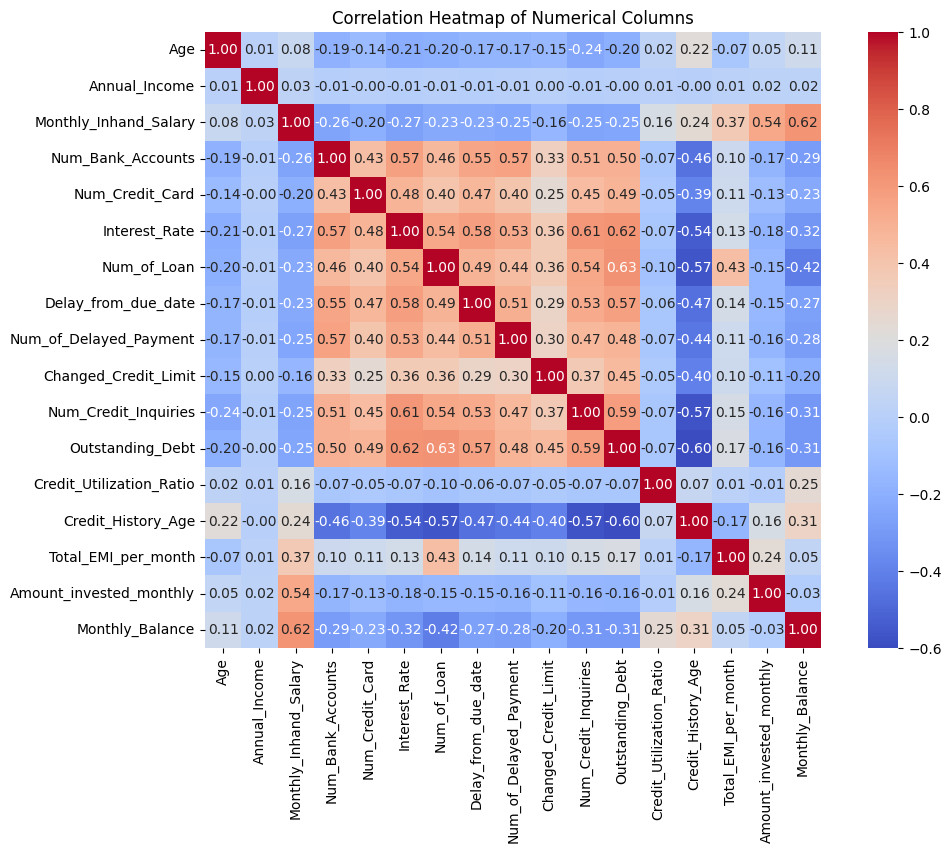

In [176]:
plt.figure(figsize=(12,8))  # size of the plot
sns.heatmap(
    correlation, 
    annot=True,          # show correlation values
    fmt=".2f",           # format to 2 decimals
    cmap="coolwarm",     # color scheme
    cbar=True,           # show color bar
    square=True          # make squares
)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#### There arent any heavily correlated columns

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


#### Let's assign X and y and split the data. For the first model we will only use numerical values

In [177]:
bank_df_clean.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [178]:
X = bank_df_clean[['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
                   'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]

In [179]:
y= bank_df_clean["Credit_Score"]

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state = 42, stratify= y) 

#### Scaling

In [182]:
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### We need to deal with class imbalance

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
sm = SMOTE(sampling_strategy= {"Poor": 38000, "Good": 38000}, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_sc, y_train)

#### Model Building

In [185]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [186]:
# Training my model
knn.fit(X_train_res, y_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [187]:
y_pred= knn.predict(X_test_sc)

In [188]:
test_acc = knn.score(X_test_sc, y_test)
print(test_acc)

0.66724


#### Let's try to get all metrics

In [189]:
from sklearn.metrics import classification_report, confusion_matrix



In [190]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

        Good       0.47      0.79      0.59      4457
        Poor       0.67      0.78      0.72      7250
    Standard       0.82      0.56      0.67     13293

    accuracy                           0.67     25000
   macro avg       0.66      0.71      0.66     25000
weighted avg       0.71      0.67      0.67     25000

[[3508  220  729]
 [ 641 5686  923]
 [3239 2567 7487]]


In [191]:
cm = confusion_matrix(y_test, y_pred)

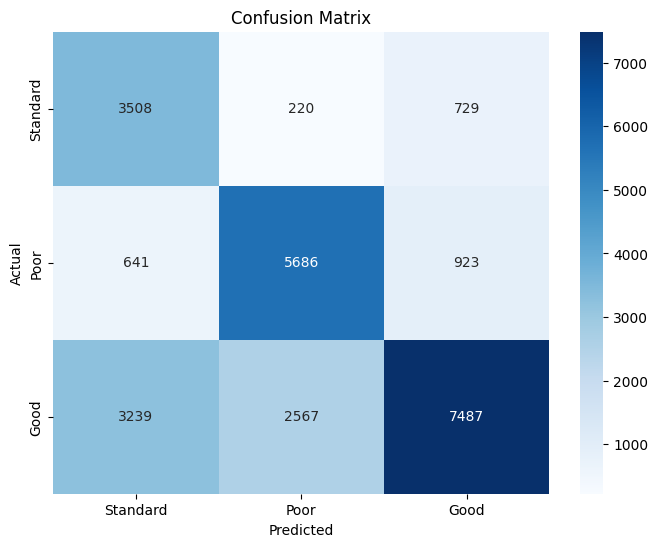

In [192]:
class_names = ['Standard', 'Poor', 'Good']  # replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Not the worst model in the world I suppose

#### Let's use more columns this time

In [193]:
X2 = bank_df_clean.iloc[:,0:21]

In [194]:
X2

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Others,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,23.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,18.0,14.0,...,4.0,Good,809.98,31.944960,219.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162
2,33.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,23.0,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,...,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,Others,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,336.472111
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,Others,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,336.472111
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,8.0,2.0,27.0,6.0,...,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,336.472111
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,...,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,336.472111


In [195]:
y2 = bank_df_clean["Credit_Score"]

In [196]:
X2.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [197]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

#### Let's do one hot encoding for the categorical columns

In [198]:
X2= pd.get_dummies( columns = ["Age", "Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first = True, data=X2)

In [199]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size= 0.25, random_state = 42, stratify= y2) 

In [200]:
sc2= StandardScaler()
X2_train_sc = sc2.fit_transform(X2_train)
X2_test_sc = sc2.transform(X2_test)

In [201]:
sm2 = SMOTE(sampling_strategy= {"Poor": 38000, "Good": 38000}, random_state=42)
X2_train_res, y2_train_res = sm2.fit_resample(X2_train_sc, y2_train)

In [202]:
knn2 = KNeighborsClassifier(n_neighbors= 5)

In [203]:
# Training my model
knn2.fit(X2_train_res, y2_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [204]:
y2_pred= knn2.predict(X2_test_sc)

In [205]:
test_acc2 = knn2.score(X2_test_sc, y2_test)
print(test_acc2) #The score is worse now unfortunately

0.61484


In [206]:
print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred)) 

              precision    recall  f1-score   support

        Good       0.46      0.78      0.57      4457
        Poor       0.59      0.71      0.64      7250
    Standard       0.78      0.51      0.62     13293

    accuracy                           0.61     25000
   macro avg       0.61      0.67      0.61     25000
weighted avg       0.67      0.61      0.62     25000

[[3456  336  665]
 [ 890 5166 1194]
 [3239 3305 6749]]


In [207]:
cm2 = confusion_matrix(y2_test, y2_pred)

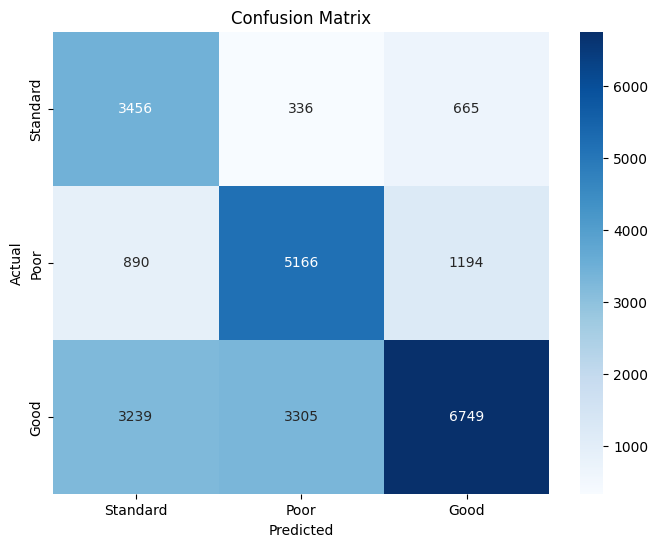

In [208]:
class_names = ['Standard', 'Poor', 'Good']  # replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(
    cm2, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [209]:
X3 = bank_df_clean.iloc[:,1:21]

In [210]:
X3

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Others,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,18.0,14.0,11.27,4.0,Good,809.98,31.944960,219.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162
2,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,3.0,7.0,9.40,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,Scientist,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,Others,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,336.472111
99996,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,Others,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,336.472111
99997,Mechanic,39628.99,3359.415833,4.0,6.0,8.0,2.0,27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,336.472111
99998,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,336.472111


In [211]:
y3 = bank_df_clean["Credit_Score"]

In [212]:
X3.columns

Index(['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [213]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                100000 non-null  object 
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

#### Let's do one hot encoding for the categorical columns

In [214]:
X3= pd.get_dummies( columns = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first = True, data=X3)

In [215]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size= 0.25, random_state = 42, stratify= y3) 

In [216]:
sc3= StandardScaler()
X3_train_sc = sc3.fit_transform(X3_train)
X3_test_sc = sc3.transform(X3_test)

In [217]:
sm3 = SMOTE(sampling_strategy= {"Poor": 38000, "Good": 38000}, random_state=42)
X3_train_res, y3_train_res = sm3.fit_resample(X3_train_sc, y3_train)

In [218]:
knn3 = KNeighborsClassifier(n_neighbors= 5)

In [219]:
# Training my model
knn3.fit(X3_train_res, y3_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [220]:
y3_pred= knn3.predict(X3_test_sc)

In [221]:
test_acc3 = knn3.score(X3_test_sc, y3_test)
print(test_acc3) #So age wasnt a good feature

0.60428


In [222]:
print(classification_report(y3_test, y3_pred))
print(confusion_matrix(y3_test, y3_pred)) 

              precision    recall  f1-score   support

        Good       0.43      0.75      0.55      4457
        Poor       0.59      0.69      0.63      7250
    Standard       0.78      0.51      0.62     13293

    accuracy                           0.60     25000
   macro avg       0.60      0.65      0.60     25000
weighted avg       0.66      0.60      0.61     25000

[[3359  402  696]
 [1068 4969 1213]
 [3405 3109 6779]]


In [223]:
cm3 = confusion_matrix(y3_test, y3_pred)

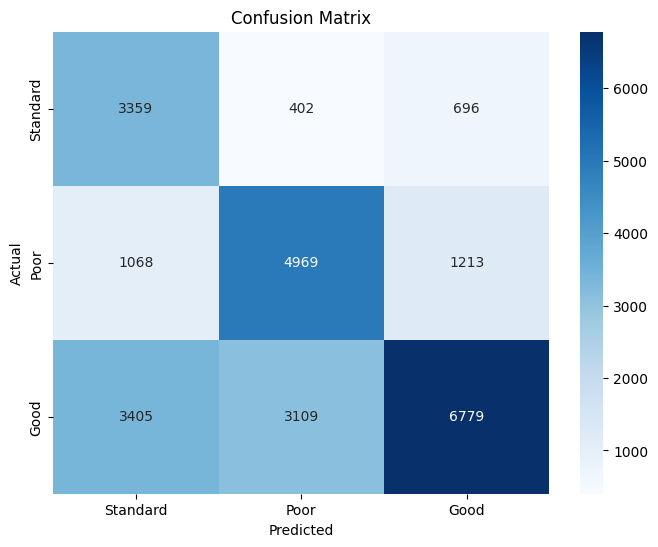

In [224]:
class_names = ['Standard', 'Poor', 'Good']  # replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(
    cm3, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Let's only use features with good correlation

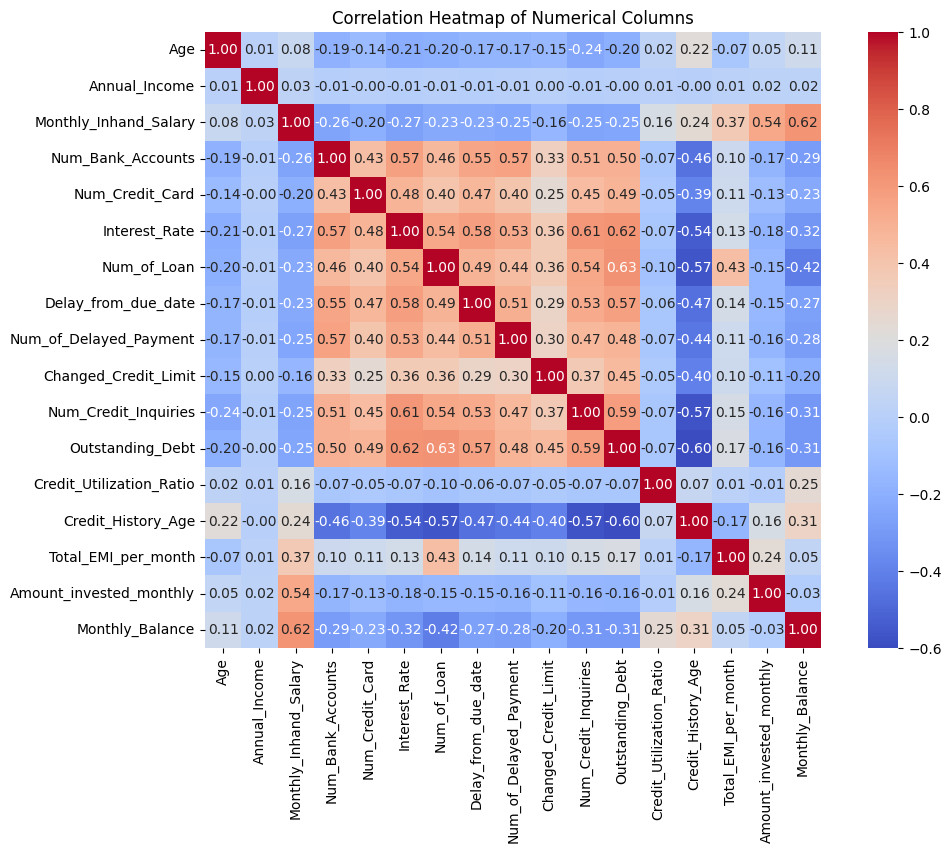

In [225]:
plt.figure(figsize=(12,8))  # size of the plot
sns.heatmap(
    correlation, 
    annot=True,          # show correlation values
    fmt=".2f",           # format to 2 decimals
    cmap="coolwarm",     # color scheme
    cbar=True,           # show color bar
    square=True          # make squares
)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [226]:
bank_df_clean.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [227]:
X4 = bank_df_clean[["Outstanding_Debt", "Num_Bank_Accounts", "Credit_History_Age", "Num_Credit_Inquiries", "Changed_Credit_Limit", 
                    "Num_of_Delayed_Payment", "Delay_from_due_date", "Num_of_Loan", "Interest_Rate", "Num_Credit_Card"]]

In [228]:
y4 = bank_df_clean["Credit_Score"]

In [229]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size= 0.25, random_state = 42, stratify= y4) 

In [230]:
sc4= StandardScaler()
X4_train_sc = sc4.fit_transform(X4_train)
X4_test_sc = sc4.transform(X4_test)

In [231]:
sm4 = SMOTE(sampling_strategy= {"Poor": 38000, "Good": 38000}, random_state=42)
X4_train_res, y4_train_res = sm4.fit_resample(X4_train_sc, y4_train)

In [232]:
knn4 = KNeighborsClassifier(n_neighbors= 3)

In [233]:
# Training my model
knn4.fit(X4_train_res, y4_train_res)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [234]:
y4_pred= knn4.predict(X4_test_sc)

In [235]:
test_acc4 = knn4.score(X4_test_sc, y4_test)
print(test_acc4) #Okay much better, I will stick to this result 

0.73596


In [236]:
print(classification_report(y4_test, y4_pred))
print(confusion_matrix(y4_test, y4_pred)) 

              precision    recall  f1-score   support

        Good       0.61      0.78      0.68      4457
        Poor       0.72      0.81      0.76      7250
    Standard       0.81      0.68      0.74     13293

    accuracy                           0.74     25000
   macro avg       0.71      0.76      0.73     25000
weighted avg       0.75      0.74      0.74     25000

[[3484   99  874]
 [ 199 5864 1187]
 [2067 2175 9051]]


In [237]:
cm4 = confusion_matrix(y4_test, y4_pred)

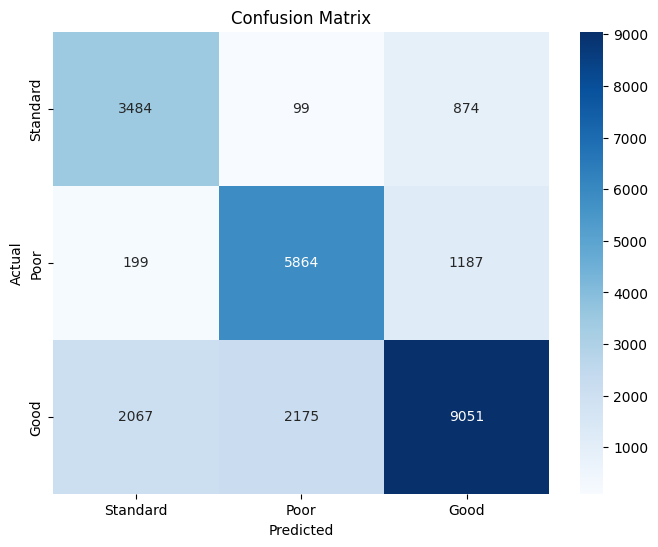

In [238]:
class_names = ['Standard', 'Poor', 'Good']  # replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(
    cm4, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### The model reached acceptable values but it's not amazing

## Logistic Regression
__Build and compare two models for your topic__
  Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


#### I will use X3 for the first model which includes nearly all columns except Age

In [239]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [240]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size= 0.25, random_state = 42, stratify= y3) 

In [241]:
sc3= StandardScaler()
X3_train_sc = sc3.fit_transform(X3_train)
X3_test_sc = sc3.transform(X3_test)

In [242]:
sm3 = SMOTE(sampling_strategy= {"Poor": 38000, "Good": 38000}, random_state=42)
X3_train_res, y3_train_res = sm3.fit_resample(X3_train_sc, y3_train)

In [243]:
# Training my model
logr.fit(X3_train_res, y3_train_res)

C:\Users\icefo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [244]:
score_logr = logr.score(X3_test_sc, y3_test)
print(score_logr)  

0.64968


In [245]:
lr1_predict = logr.predict(X3_test_sc)

In [246]:
cm_lr1 = confusion_matrix(y3_test, lr1_predict)

In [247]:
print(classification_report(y3_test, lr1_predict))

              precision    recall  f1-score   support

        Good       0.48      0.81      0.60      4457
        Poor       0.63      0.68      0.65      7250
    Standard       0.80      0.58      0.67     13293

    accuracy                           0.65     25000
   macro avg       0.64      0.69      0.64     25000
weighted avg       0.69      0.65      0.65     25000



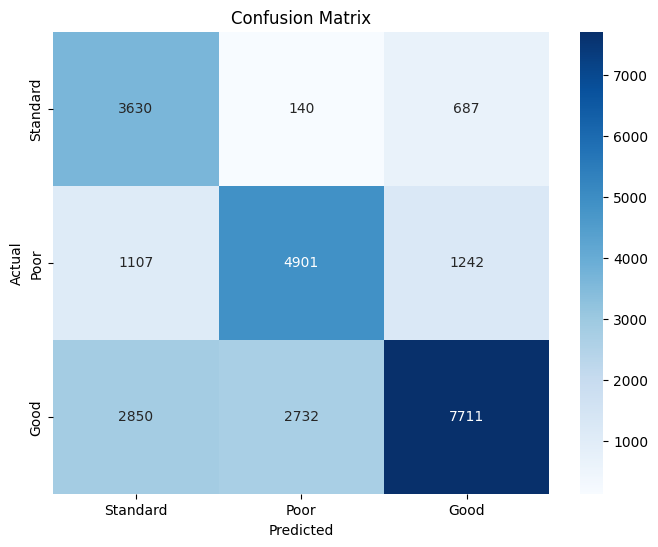

In [248]:
class_names = ['Standard', 'Poor', 'Good']  # replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_lr1, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Let's try the X4 dataset

In [249]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size= 0.25, random_state = 42, stratify= y4) 

In [250]:
sc4= StandardScaler()
X4_train_sc = sc4.fit_transform(X4_train)
X4_test_sc = sc4.transform(X4_test)

In [251]:
logr2 = LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [252]:
sm4 = SMOTE(sampling_strategy= {"Poor": 38000, "Good": 38000}, random_state=42)
X4_train_res, y4_train_res = sm4.fit_resample(X4_train_sc, y4_train)

In [253]:
logr2.fit(X4_train_res, y4_train_res)

C:\Users\icefo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [254]:
score_logr2 = logr2.score(X4_test_sc, y4_test)
print(score_logr2)  #It is lower surprisingly

0.60348


In [255]:
lr_predict = logr2.predict(X4_test_sc)

In [256]:
cm_lr2 = confusion_matrix(y4_test, lr_predict)

In [257]:
print(classification_report(y4_test, lr_predict))

              precision    recall  f1-score   support

        Good       0.42      0.78      0.55      4457
        Poor       0.61      0.68      0.64      7250
    Standard       0.76      0.50      0.61     13293

    accuracy                           0.60     25000
   macro avg       0.60      0.65      0.60     25000
weighted avg       0.66      0.60      0.61     25000



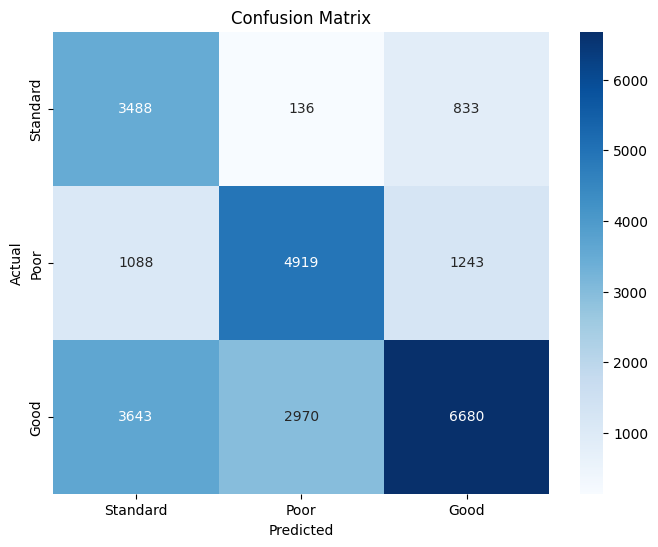

In [258]:
class_names = ['Standard', 'Poor', 'Good']  # replace with your actual class names

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_lr2, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Let's compare Accuracy of training and testing data

In [259]:
print("Testing r2",knn4.score(X4_test_sc, y4_test))
print("Training r2",knn4.score(X4_train_res, y4_train_res))
#There is overfitting in the model so it could definitely be improved

Testing r2 0.73596
Training r2 0.9161122185690492


In [260]:
print("Testing r2", logr.score(X3_test_sc, y3_test))
print("Training r2", logr.score(X3_train_res, y3_train_res)) #not terribly different, but maybe more data would have helped

Testing r2 0.64968
Training r2 0.6930126595386646


#### Comparison and findings
- The first Linear Regression model is better using the X3 (instead of X4) dataset which is different from the KNN model which prefers the X4 dataset
- KNN models work better as the relationship is not strictly linear between the variables.
- There is some overfitting in the model but it may be due to using the median to replace many values in the database as increasing k value did not help

## Final Model & Insights

- The Last KNN model (knn4) is the prefered one. It has the best values out of the rest and the linear regression models did not perform as well as the knn counterparts. 
- With 0.735 accuracy, the model is usable compared to just guessing (33.3%) or relying on the Standard category percentage (around 51%). The biggest issue with the data is the imbalance between classes and bias towards "Standard" credit score. 
- There is room for improvement as we could test removing and adding features (especially categorical ones) and maybe use correlation that is suitable for categorical columns to choose the best ones. The overfitting problem could also be diagnosed and addressed. However, the biggest limitation is the time constraint considering how much cleaning the data needs.
